In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
df = pd.read_csv('adult.csv')

In [12]:
df.columns
df.head()
df.info()
df.shape

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

#### 提取数据+描述性分析

In [14]:
# 节选部分数据
df = df.sample(500, random_state=1) 
len(df)
df.head()

500

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
19269,57,Federal-gov,135028,HS-grad,9,Separated,Adm-clerical,Other-relative,Black,Female,0,0,35,United-States,<=50K
19402,23,Private,201664,HS-grad,9,Married-civ-spouse,Adm-clerical,Other-relative,White,Male,0,0,40,United-States,<=50K
17767,50,Self-emp-not-inc,192654,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,United-States,<=50K
28054,50,Federal-gov,222020,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,48,United-States,<=50K
31446,38,Private,461337,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0,0,33,United-States,<=50K


In [15]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.044819,-0.003402,0.068986,0.067976,0.088779
fnlwgt,-0.044819,1.000000,0.014280,-0.035879,-0.058480,-0.019102
education.num,-0.003402,0.014280,1.000000,0.128262,0.143796,0.194980
capital.gain,0.068986,-0.035879,0.128262,1.000000,-0.026987,0.023619
capital.loss,0.067976,-0.058480,0.143796,-0.026987,1.000000,0.052463
hours.per.week,0.088779,-0.019102,0.194980,0.023619,0.052463,1.000000


In [16]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.67200,189034.854000,10.098000,611.436000,90.550000,40.142000
std,14.29269,108084.590346,2.634821,4937.728719,416.323439,12.744201
min,17.00000,26358.000000,1.000000,0.000000,0.000000,1.000000
25%,27.00000,113465.500000,9.000000,0.000000,0.000000,38.000000
50%,37.00000,182841.500000,10.000000,0.000000,0.000000,40.000000
75%,48.00000,235214.000000,13.000000,0.000000,0.000000,45.000000
max,81.00000,799281.000000,16.000000,99999.000000,2415.000000,99.000000


In [17]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

#### discretization-分箱

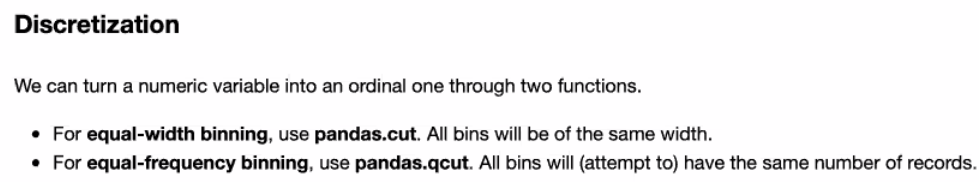

##### 等距分箱cut()

In [20]:
# example: discretize age into 5 bins of equal width
df2 = df.copy()
df2['discretized_age_EW']=pd.cut(df2.age,5)
df2['discretized_age_EW'].unique()

[(55.4, 68.2], (16.936, 29.8], (42.6, 55.4], (29.8, 42.6], (68.2, 81.0]]
Categories (5, interval[float64]): [(16.936, 29.8] < (29.8, 42.6] < (42.6, 55.4] < (55.4, 68.2] < (68.2, 81.0]]

##### 等频分箱qcut()

In [22]:
df2['discretized_age_EF']=pd.qcut(df2.age,5)
df2['discretized_age_EF'].unique()

[(51.0, 81.0], (16.999, 25.0], (42.0, 51.0], (32.0, 42.0], (25.0, 32.0]]
Categories (5, interval[float64]): [(16.999, 25.0] < (25.0, 32.0] < (32.0, 42.0] < (42.0, 51.0] < (51.0, 81.0]]

#### one numeric variable

##### countplot统计条形图

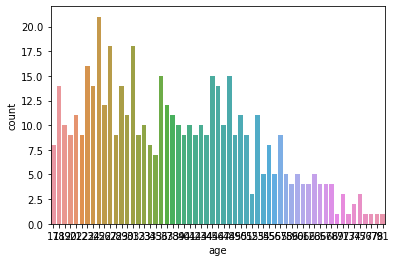

In [27]:
sns.countplot(df.age)
sns.countplot(x='age',data=df)  # 功能同上

##### distplot分布图

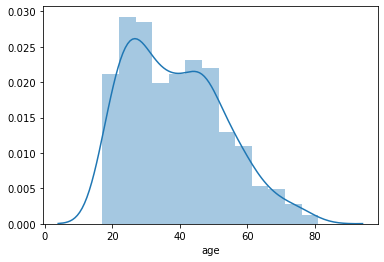

In [29]:
sns.distplot(df.age)  # default bin数

<b>education</b>

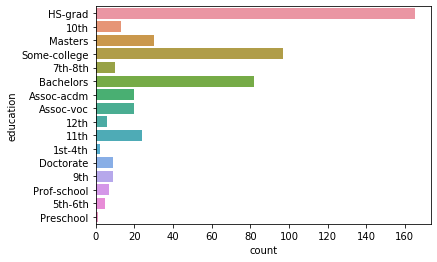

In [31]:
sns.countplot(y='education',data=df)

<b>race</b>

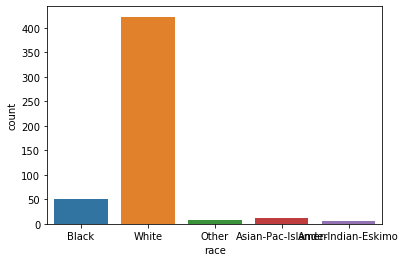

In [33]:
sns.countplot(x='race',data=df)

<b>**discretized_age_EW,discretized_age_EF**</b>

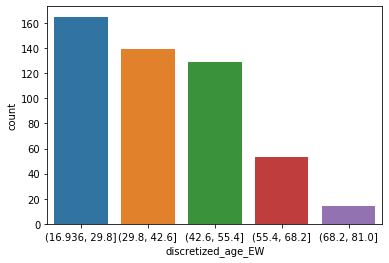

In [35]:
sns.countplot(x='discretized_age_EW',data=df2)

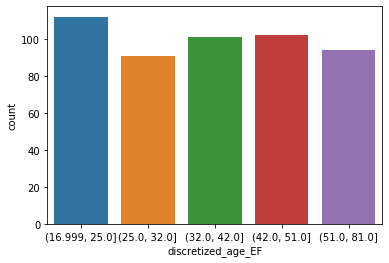

In [36]:
sns.countplot(x='discretized_age_EF',data=df2)

#### one categorical vs one numeric variable

for each value of 'marital.status',display the mean age

In [37]:
df['marital.status'].unique()

array(['Separated', 'Married-civ-spouse', 'Never-married', 'Divorced',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

##### catplot()分类作图

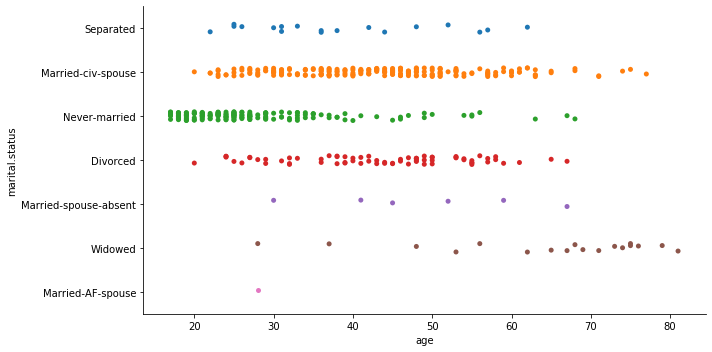

In [41]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2,   # aspect可以拉伸图形使显示清楚
            kind='strip')  

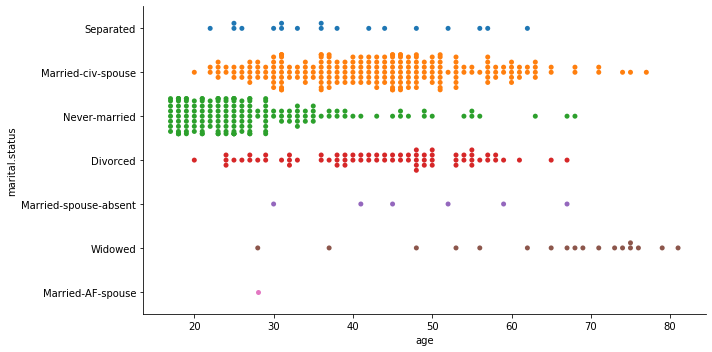

In [42]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2,   # aspect可以拉伸图形使显示清楚
            kind='swarm')   # swarm显示全部个体

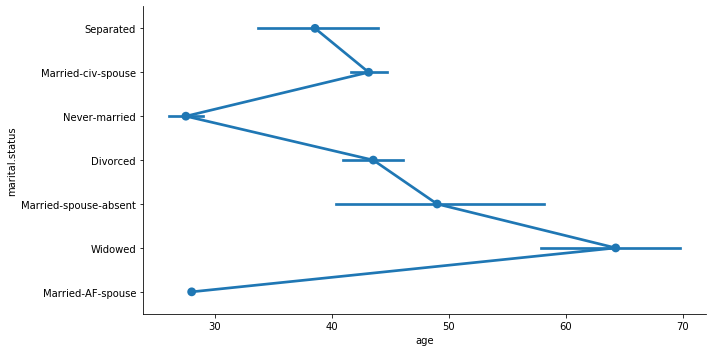

In [43]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2,   # aspect可以拉伸图形使显示清楚
            kind='point')   # point是每个组的均值，线是置信度

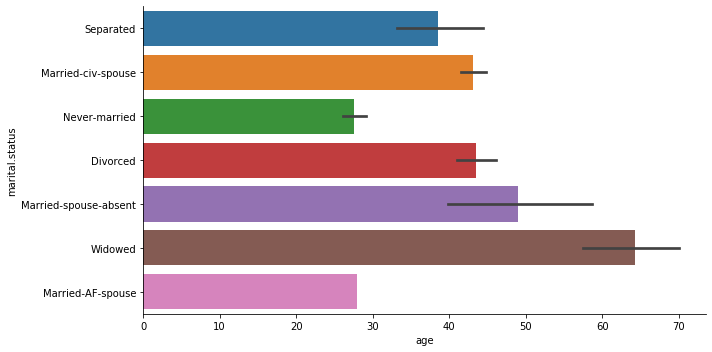

In [44]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2,   # aspect可以拉伸图形使显示清楚
            kind='bar')   # 线是置信度

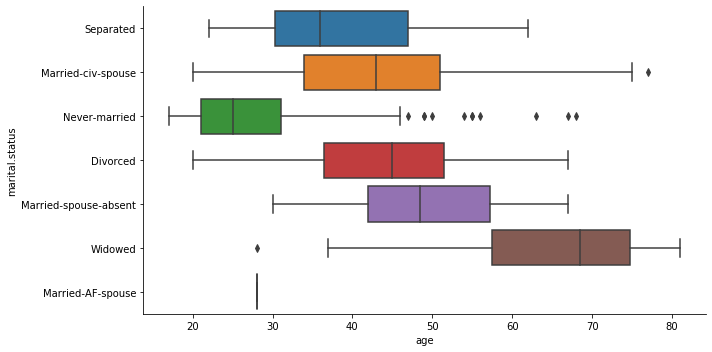

In [45]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2,   # aspect可以拉伸图形使显示清楚
            kind='box')   # min,max,median,上下四分位数，特值点

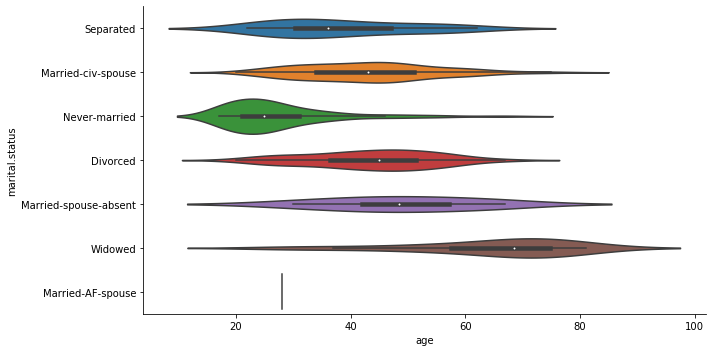

In [46]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2,   # aspect可以拉伸图形使显示清楚
            kind='violin')   # 另一种箱型图，同时表现核密度

#### two numeric variable 【regression】

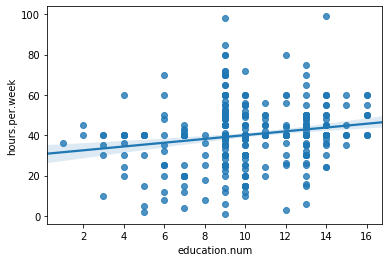

In [47]:
# 展现相关关系

sns.regplot(x='education.num',y='hours.per.week',data=df)

##### two categorical variable vs one numeric variable

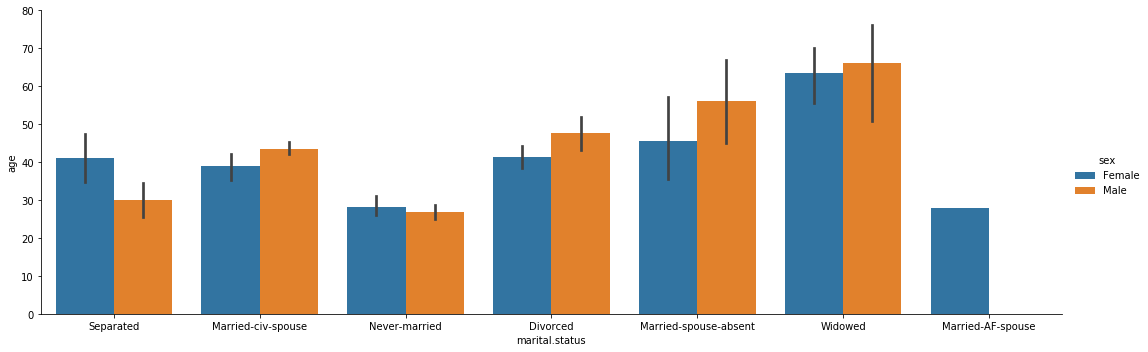

In [50]:
# hue参数进行分类展示
sns.catplot(x='marital.status',y='age',hue='sex',data=df,kind='bar',aspect=3)

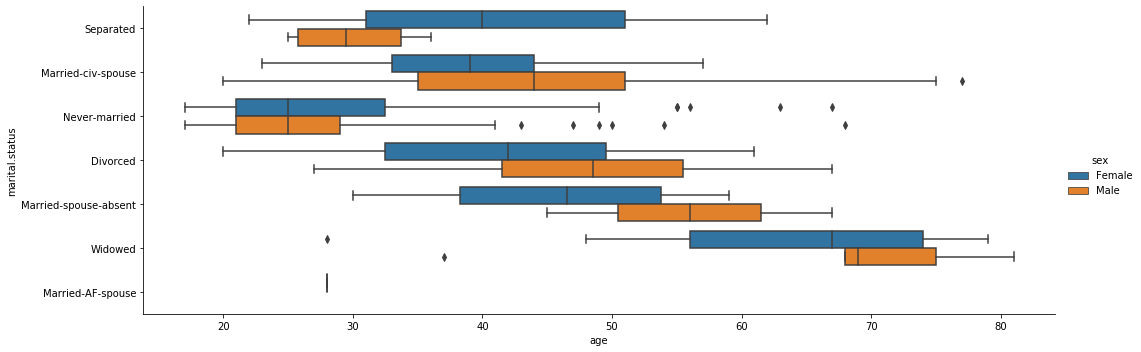

In [52]:
sns.catplot(y='marital.status',x='age',hue='sex',data=df,kind='box',aspect=3)

#####  two categorical variable and one numeric variable

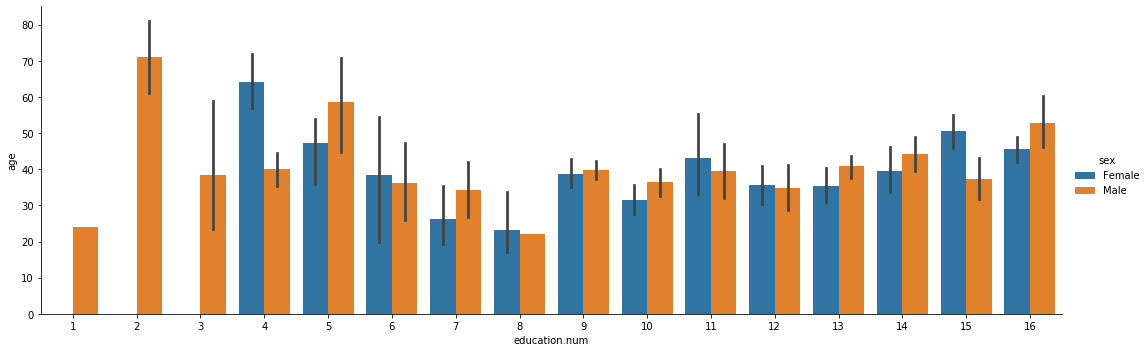

In [54]:
sns.catplot(x='education.num',y='age',hue='sex',data=df,kind='bar',aspect=3)

##### two categorical variable (better if ordinal) and one numeric variable——heatmap()

In [56]:
gr = df2.groupby(['education.num','discretized_age_EF'])['capital.gain'].mean()
gr

education.num  discretized_age_EF
1              (16.999, 25.0]           0.000000
               (25.0, 32.0]                  NaN
               (32.0, 42.0]                  NaN
               (42.0, 51.0]                  NaN
               (51.0, 81.0]                  NaN
                                        ...     
16             (16.999, 25.0]                NaN
               (25.0, 32.0]                  NaN
               (32.0, 42.0]          4307.000000
               (42.0, 51.0]          3756.000000
               (51.0, 81.0]          6683.666667
Name: capital.gain, Length: 80, dtype: float64

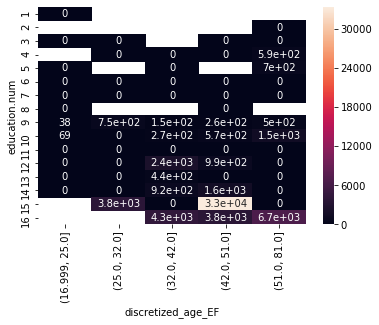

In [60]:
sns.heatmap(gr.unstack(),annot=True)

#### four variable: 2 numeric & 2 categorical

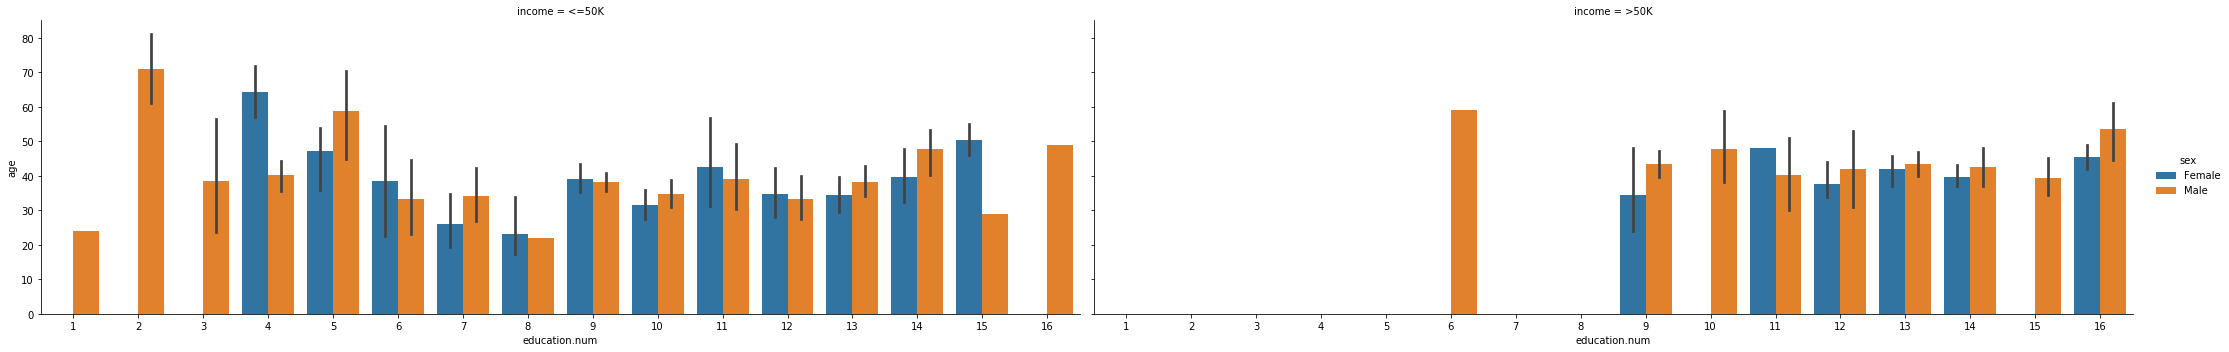

In [61]:
sns.catplot(x='education.num',y='age',hue='sex',col='income',data=df,kind='bar',aspect=3)

##### four variable: 1 numeric & 3 categorical

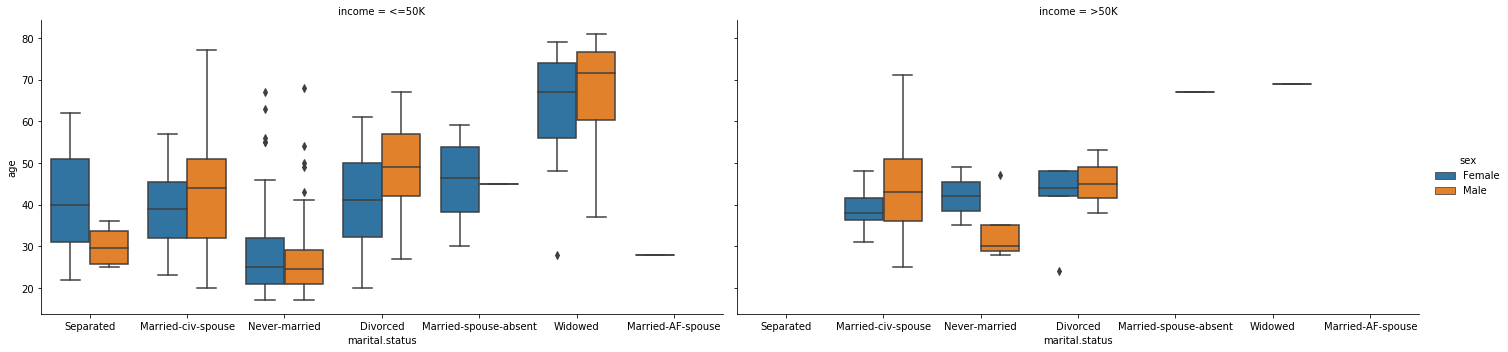

In [65]:
sns.catplot(x='marital.status',y='age',hue='sex',col='income',data=df,kind='box',aspect=2)

#### n numeric variables——pairplots()相关图

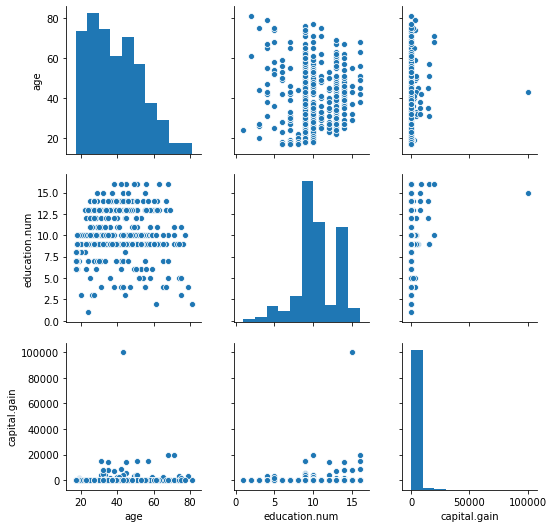

In [66]:
sns.pairplot(df[['age','education.num','capital.gain']])